# Проект по SQL

Коронавирус изменил обычный уклад жизни людей. Они стали больше находится дома в результате чего вырос спрос на приложения  по чтению книг по подписке. Так как наша компания купила один из крупных сервисов в данной области необходимо проанализировать базу данных с информацией о книгах и сформулировать ценностное предложение для нового продукта

# Задача 

Проанализировать базу данных с информацией о книгах, издательствах, авторах и оценках чистателей и ответить на следующие вопросы:
- Сколько книг вышло после 1 января 2000 года
- Для каждой книги посчитать количество обзоров и среднюю оценку
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц
- Определить автора с самой высокой средней оценкой книг (Учитывать только книги с 50 и более оценок)
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок

<h1>Содержание <span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подключение-библиотек" data-toc-modified-id="Подключение-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подключение библиотек</a></span><ul class="toc-item"><li><span><a href="#Параметры-для-подключения-к-БД" data-toc-modified-id="Параметры-для-подключения-к-БД-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Параметры для подключения к БД</a></span></li><li><span><a href="#Исследование-таблиц" data-toc-modified-id="Исследование-таблиц-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Исследование таблиц</a></span></li></ul></li><li><span><a href="#Исследовательский-ананлиз-данных" data-toc-modified-id="Исследовательский-ананлиз-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследовательский ананлиз данных</a></span><ul class="toc-item"><li><span><a href="#Сколько-книг-вышло-после-1-января-2000-года" data-toc-modified-id="Сколько-книг-вышло-после-1-января-2000-года-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Сколько книг вышло после 1 января 2000 года</a></span></li><li><span><a href="#Для-каждой-книги-посчитать-количество-обзоров-и-среднюю-оценку" data-toc-modified-id="Для-каждой-книги-посчитать-количество-обзоров-и-среднюю-оценку-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Для каждой книги посчитать количество обзоров и среднюю оценку</a></span></li><li><span><a href="#Определить-издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц" data-toc-modified-id="Определить-издательство,-которое-выпустило-наибольшее-число-книг-толще-50-страниц-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Определить издательство, которое выпустило наибольшее число книг толще 50 страниц</a></span></li><li><span><a href="#Определить-автора-с-самой-высокой-средней-оценкой-книг-(Учитывать-только-книги-с-50-и-более-оценок)" data-toc-modified-id="Определить-автора-с-самой-высокой-средней-оценкой-книг-(Учитывать-только-книги-с-50-и-более-оценок)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Определить автора с самой высокой средней оценкой книг (Учитывать только книги с 50 и более оценок)</a></span></li><li><span><a href="#Посчитать-среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок" data-toc-modified-id="Посчитать-среднее-количество-обзоров-от-пользователей,-которые-поставили-больше-50-оценок-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подключение библиотек

ER - диаграмма базы данных

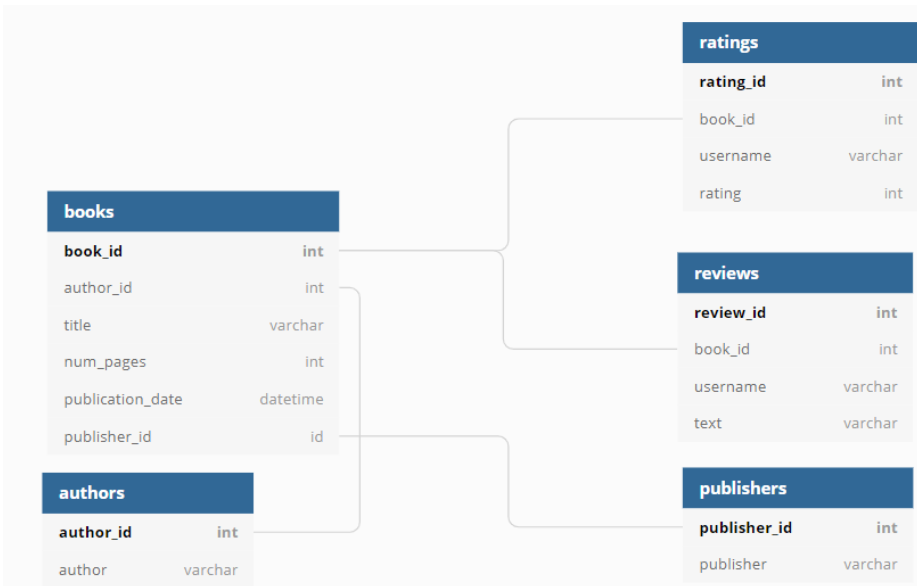

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
pd.set_option('display.max_columns', 40)
import warnings

###  Параметры для подключения к БД

In [3]:
db_config = {
    'user': 'praktika_sql', # имя пользователя
    'pwd': 'Sdf3$1;d-d12ad', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'sql-project-db' # название базы данных
} 

In [4]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [5]:
engine = create_engine(connection_string)

###  Исследование таблиц

In [6]:
tabels = ['authors', 'books', 'ratings', 'reviews', 'publishers']

In [7]:
for i in tabels:
    query = '''
        SELECT * 
        FROM {}
    '''.format(i)   
    temp_df = pd.read_sql_query(query, con = engine) 
    display(temp_df.head())
    print(temp_df.info())

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB
None


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB
None


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB
None


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB
None


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB
None


## Исследовательский ананлиз данных

In [8]:
def query_func(query):
    query_result = pd.read_sql_query(query, con = engine)
    return query_result

### Сколько книг вышло после 1 января 2000 года

In [9]:
query = '''
   SELECT COUNT(DISTINCT title)
     FROM books
    WHERE publication_date::date >= '2000-01-01'::date
'''

In [10]:
amount_books = query_func(query)

In [11]:
amount_books

,count
0,820


### Для каждой книги посчитать количество обзоров и среднюю оценку

In [12]:
query = '''
WITH rate AS (SELECT b.title as title,
                     AVG(rat.rating) AS rating_avg
                FROM books AS b
                LEFT JOIN ratings AS rat ON b.book_id = rat.book_id
               GROUP BY b.title),
   
   review AS (SELECT b.title as title,
                     COUNT(rev.review_id) AS review_cnt
                FROM books AS b
                LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
               GROUP BY b.title)
SELECT rate.title,
       rate.rating_avg,
       review.review_cnt
  FROM rate
  JOIN review ON rate.title = review.title
'''

In [13]:
books_rev_rat = query_func(query)

In [14]:
books_rev_rat

,title,rating_avg,review_cnt
0,'Salem's Lot,3.666667,2
1,1 000 Places to See Before You Die,2.500000,1
2,13 Little Blue Envelopes (Little Blue Envelope...,4.666667,3
3,1491: New Revelations of the Americas Before C...,4.500000,2
4,1776,4.000000,4
...,...,...,...
994,Wyrd Sisters (Discworld #6; Witches #2),3.666667,3
995,Xenocide (Ender's Saga #3),3.400000,3
996,Year of Wonders,3.200000,4
997,You Suck (A Love Story #2),4.500000,2


### Определить издательство, которое выпустило наибольшее число книг толще 50 страниц

In [15]:
query = '''
   SELECT pub.publisher,
          COUNT(b.title)         
     FROM books AS b
    INNER JOIN publishers AS pub ON b.publisher_id = pub.publisher_id
    WHERE b.num_pages > 50
    GROUP BY pub.publisher
    ORDER BY COUNT(b.title) DESC
    LIMIT 1
    
'''

In [16]:
publisher_book_cnt = query_func(query)
publisher_book_cnt

,publisher,count
0,Penguin Books,42


### Определить автора с самой высокой средней оценкой книг (Учитывать только книги с 50 и более оценок)

In [17]:
query = '''
   SELECT auth.author,
          AVG(rat.rating) AS average_rating       
     FROM books AS b
    INNER JOIN authors AS auth ON b.author_id = auth.author_id
    INNER JOIN ratings AS rat ON b.book_id = rat.book_id
    WHERE b.title IN (SELECT b.title as title                            
                        FROM books AS b
                       INNER JOIN ratings AS rat ON b.book_id = rat.book_id
                       GROUP BY b.title
                      HAVING COUNT(rat.rating) >= 50)                                           
    GROUP BY auth.author
    ORDER BY average_rating DESC
    LIMIT 1
    
'''

In [18]:
authors = query_func(query)

In [19]:
authors

,author,average_rating
0,J.K. Rowling/Mary GrandPré,4.287097


### Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [20]:
query = '''
WITH tmp_tbl AS (SELECT username,
                        COUNT(review_id) AS cnt_review
                   FROM reviews
                  WHERE username IN (SELECT username
                                       FROM ratings
                                      GROUP BY username
                                     HAVING COUNT(rating) > 50)
                  GROUP BY  username
)
SELECT FLOOR(AVG(cnt_review))
  FROM tmp_tbl
'''

In [21]:
average_reviews_user = query_func(query)

In [22]:
average_reviews_user 

,floor
0,24.0


## Вывод

На основании проведенного анализа можно сделать следующие выводы:
- C 1 января 2000 года было выпущено 820 книг
- Для каждой книги была получена информация о количестве обзоров и среднем рейтинге
- Издательством которое выпустило наибольшее число книг толще 50 страниц оказалось `Penguin Books` 
- Автором с самой высокой средней оценкой книг оказался `J.K. Rowling/Mary GrandPré`
- Пользователи которые поставили больше 50 оценок в среднем делали по 24 обзора